This notebook is used to analyse the resulting dataframe from the main bouy data sruvey

In [33]:
import numpy as np
import pandas as pd
import xarray as xr
import os
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

In [52]:
write_folder = './1h_survey'
result_df_fn = 'result_df'
kml_pinmap_fn = 'kml_pinmap'

with open(os.path.join(write_folder, result_df_fn),'rb') as f_r:
    shore_survey_df = pickle.load(f_r)

In [53]:
shore_survey_df

,bouy_file_name,bouy_longitude,bouy_latitude,bouy_time,bouy_variable_name,bouy_variable_value,sar_url,sar_mode,sar_polarization,sar_platform,sar_start_time,sar_stop_time,sar_coordinates
0,GL_TS_MO_41056.nc,-65.463997,18.261000,2021-12-29 10:09:59.999999744,WSPD,6.799,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-12-29 10:14:46,2021-12-29 10:15:11,"[[-64.408401, 17.459696], [-64.094124, 18.9706..."
1,GL_TS_MO_41056.nc,-65.463997,18.261000,2021-12-19 22:30:00.000000000,WSPD,7.799,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-12-19 22:28:35,2021-12-19 22:29:00,"[[-66.193626, 18.813972], [-65.879509, 17.3031..."
2,GL_TS_MO_41056.nc,-65.463997,18.261000,2021-12-17 10:09:59.999999744,WSPD,7.299,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-12-17 10:14:47,2021-12-17 10:15:12,"[[-64.40966, 17.459682], [-64.095413, 18.97060..."
3,GL_TS_MO_41056.nc,-65.463997,18.261000,2021-12-07 22:30:00.000000000,WSPD,7.399,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-12-07 22:28:35,2021-12-07 22:29:00,"[[-66.194122, 18.814003], [-65.879982, 17.3031..."
4,GL_TS_MO_41056.nc,-65.463997,18.261000,2021-12-05 10:09:59.999999744,WSPD,6.299,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-12-05 10:14:47,2021-12-05 10:15:12,"[[-64.409782, 17.459616], [-64.095543, 18.9705..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67648,NO_TS_MO_Europlatform2.nc,3.276389,51.998611,2021-01-08 06:10:00.000000000,VAVH,1.470,https://datapool.asf.alaska.edu/GRD_HD/SB/S1B_...,IW,"[VV, VH]",Sentinel-1B,2021-01-08 06:05:54,2021-01-08 06:06:19,"[[3.625535, 51.564022], [4.13135, 53.056099], ..."
67649,NO_TS_MO_Europlatform2.nc,3.276389,51.998611,2021-01-06 17:30:00.000000000,VAVH,1.280,https://datapool.asf.alaska.edu/GRD_HD/SB/S1B_...,IW,"[VV, VH]",Sentinel-1B,2021-01-06 17:32:29,2021-01-06 17:32:54,"[[1.747713, 51.907463], [2.236964, 50.414387],..."
67650,NO_TS_MO_Europlatform2.nc,3.276389,51.998611,2021-01-05 17:39:59.999999744,VAVH,1.820,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-01-05 17:41:27,2021-01-05 17:41:52,"[[-0.343658, 52.013187], [0.143647, 50.519848]..."
67651,NO_TS_MO_Europlatform2.nc,3.276389,51.998611,2021-01-03 06:00:00.000000000,VAVH,0.820,https://datapool.asf.alaska.edu/GRD_HD/SB/S1B_...,IW,"[VV, VH]",Sentinel-1B,2021-01-03 05:58:01,2021-01-03 05:58:26,"[[5.282145, 50.341362], [5.773809, 51.834118],..."


In [54]:
print(shore_survey_df['bouy_variable_name'].value_counts())
print('\n', shore_survey_df['sar_mode'].value_counts())
print('\n', shore_survey_df['sar_polarization'].value_counts())

VHM0    25396
WSPD    22145
VAVH    20112
Name: bouy_variable_name, dtype: int64

 IW    63964
EW     3689
Name: sar_mode, dtype: int64

 [VV, VH]    63925
[HH, HV]     3680
[HH]           48
Name: sar_polarization, dtype: int64


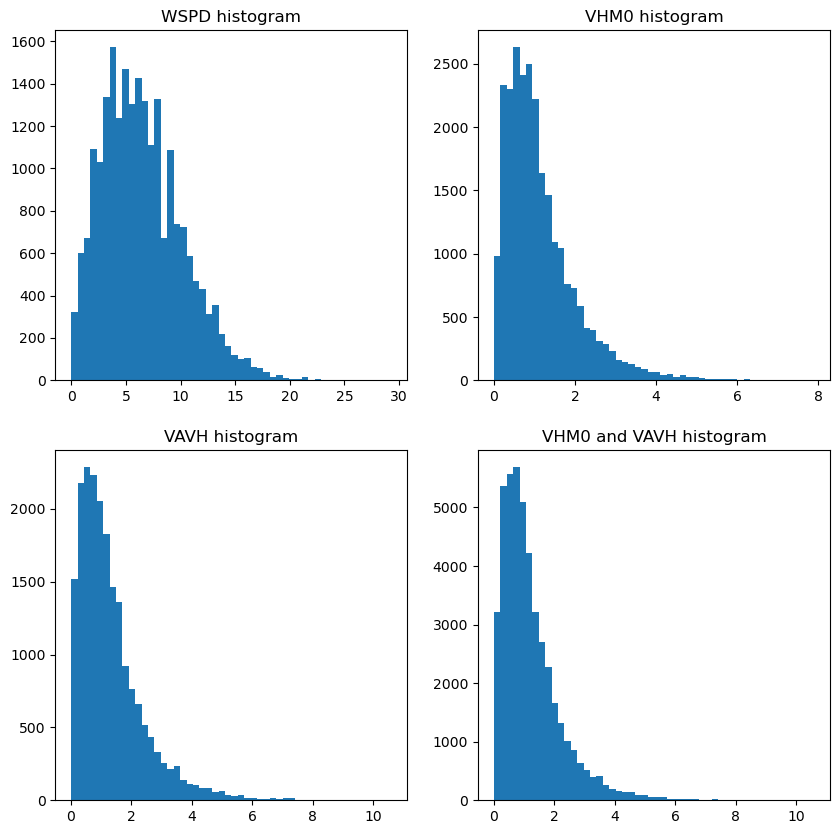

In [55]:
#plot distribution of variable values
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
WSPD_filter = shore_survey_df['bouy_variable_name'] == 'WSPD'
axs[0,0].hist(shore_survey_df[WSPD_filter]['bouy_variable_value'], bins=50)
axs[0,0].set_title('WSPD histogram')

VHM0_filter = shore_survey_df['bouy_variable_name'] == 'VHM0'
axs[0,1].hist(shore_survey_df[VHM0_filter]['bouy_variable_value'], bins=50)
axs[0,1].set_title('VHM0 histogram')

VAVH_filter = shore_survey_df['bouy_variable_name'] == 'VAVH'
axs[1,0].hist(shore_survey_df[VAVH_filter]['bouy_variable_value'], bins=50)
axs[1,0].set_title('VAVH histogram')

VHM0_VAVH_filter = (shore_survey_df['bouy_variable_name'] == 'VHM0') | (shore_survey_df['bouy_variable_name'] == 'VAVH')
axs[1,1].hist(shore_survey_df[VHM0_VAVH_filter]['bouy_variable_value'], bins=50)
axs[1,1].set_title('VHM0 and VAVH histogram')
plt.show()